In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from mlsmote import MLSMOTE

import tensorflow as tf
from tensorflow.keras import backend as K
# from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
FILE_PATH='data/riasec/labeled-data.csv'
EXCEPTION_SCORES=[0, 8, 16, 32]
THRESHOLD=0.2
EPOCHS=50
BATCH_SIZE=64
INPUT_SHAPE=48
OUTPUT_SHAPE=6

In [3]:
df = pd.read_csv(FILE_PATH)
# df = df[~(
#     (df['R_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['I_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['A_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['S_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['E_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['C_Score'].isin(EXCEPTION_SCORES))
# )]

In [4]:
print(df.columns)

Index(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'I1', 'I2', 'I3', 'I4',
       'I5', 'I6', 'I7', 'I8', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'E1', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'R_Score', 'I_Score', 'A_Score', 'S_Score', 'E_Score', 'C_Score',
       'R_Prob', 'I_Prob', 'A_Prob', 'S_Prob', 'E_Prob', 'C_Prob'],
      dtype='object')


In [5]:
feature_columns = [f'{col}{i}' for col in 'RIASEC' for i in range(1, 9)]
x = df[feature_columns]

label_columns = ['R_Prob','I_Prob','A_Prob','S_Prob','E_Prob','C_Prob']
y = (df[label_columns] >= THRESHOLD).astype(int)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Data training shape\t: {x_train.shape[:]}")
print(f"Data testing shape\t: {x_test.shape[:]}")
print(f"Label training shape\t: {y_train.shape[:]}")
print(f"Label testing shape\t: {y_test.shape[:]}")

print(f"\nData training sample\t:\n,{x_train.head()}")
print(f"\nLabel training sample\t:\n,{y_train.head()}")

Data training shape	: (108611, 48)
Data testing shape	: (27153, 48)
Label training shape	: (108611, 6)
Label testing shape	: (27153, 6)

Data training sample	:
,        R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  E7  E8  C1  C2  C3  C4  \
22808    0   0   0   2   0   0   0   0   3   3  ...   0   3   0   0   0   1   
83359    2   3   3   2   1   3   2   2   3   4  ...   2   4   2   4   3   1   
68299    0   0   0   0   0   0   0   0   0   1  ...   0   4   0   0   0   0   
110292   2   1   0   1   0   0   1   2   4   4  ...   2   3   3   4   1   2   
89050    0   0   0   0   0   1   0   0   3   0  ...   2   1   0   0   1   1   

        C5  C6  C7  C8  
22808    0   0   0   0  
83359    3   3   2   2  
68299    0   2   0   0  
110292   1   4   1   2  
89050    1   1   1   0  

[5 rows x 48 columns]

Label training sample	:
,        R_Prob  I_Prob  A_Prob  S_Prob  E_Prob  C_Prob
22808        0       1       1       1       0       0
83359        0       0       0       0       0       0


In [7]:
# x_resampled, y_resampled = MLSMOTE(x_train, y_train, 100)

# print(f"Data training shape\t: {x_resampled.shape[:]}")
# print(f"Label training shape\t: {y_resampled.shape[:]}")

In [ ]:
def f1_score(y_true, y_pred):
    y_pred_classes = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred_classes, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred_classes, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred_classes), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return K.mean(f1)

In [57]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_layer_1'),
    tf.keras.layers.Dropout(0.5, name='dropout_layer_1'),
    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_layer_2'),
    tf.keras.layers.Dropout(0.3, name='dropout_layer_2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation='sigmoid', name='output_layer')
])

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 64)                3136      
                                                                 
 dropout_layer_1 (Dropout)   (None, 64)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 32)                2080      
                                                                 
 dropout_layer_2 (Dropout)   (None, 32)                0         
                                                                 
 output_layer (Dense)        (None, 6)                 198       
                                                                 
Total params: 5414 (21.15 KB)
Trainable params: 5414 (21.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=[f1_score])

In [60]:
history = model.fit(x_train, y_train, epochs=100, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
1698/1698 [==============================] - 6s 3ms/step - loss: 1.8435 - f1_score: 0.3444 - val_loss: 1.5081 - val_f1_score: 0.3124
Epoch 2/100
1698/1698 [==============================] - 5s 3ms/step - loss: 1.5477 - f1_score: 0.3625 - val_loss: 1.3549 - val_f1_score: 0.3892
Epoch 3/100
1698/1698 [==============================] - 4s 3ms/step - loss: 1.3707 - f1_score: 0.3959 - val_loss: 1.2160 - val_f1_score: 0.4531
Epoch 4/100
1698/1698 [==============================] - 4s 2ms/step - loss: 1.2299 - f1_score: 0.4244 - val_loss: 1.0906 - val_f1_score: 0.4770
Epoch 5/100
1698/1698 [==============================] - 4s 2ms/step - loss: 1.1080 - f1_score: 0.4450 - val_loss: 0.9781 - val_f1_score: 0.4941
Epoch 6/100
1698/1698 [==============================] - 4s 2ms/step - loss: 1.0011 - f1_score: 0.4599 - val_loss: 0.8790 - val_f1_score: 0.5139
Epoch 7/100
1698/1698 [==============================] - 5s 3ms/step - loss: 0.9081 - f1_score: 0.4799 - val_loss: 0.7917 - val_f1

In [61]:
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]}, F1 Score: {results[1]}")

849/849 [==============================] - 1s 1ms/step - loss: 0.1961 - f1_score: 0.8498
Loss: 0.19607704877853394, F1 Score: 0.8497892618179321


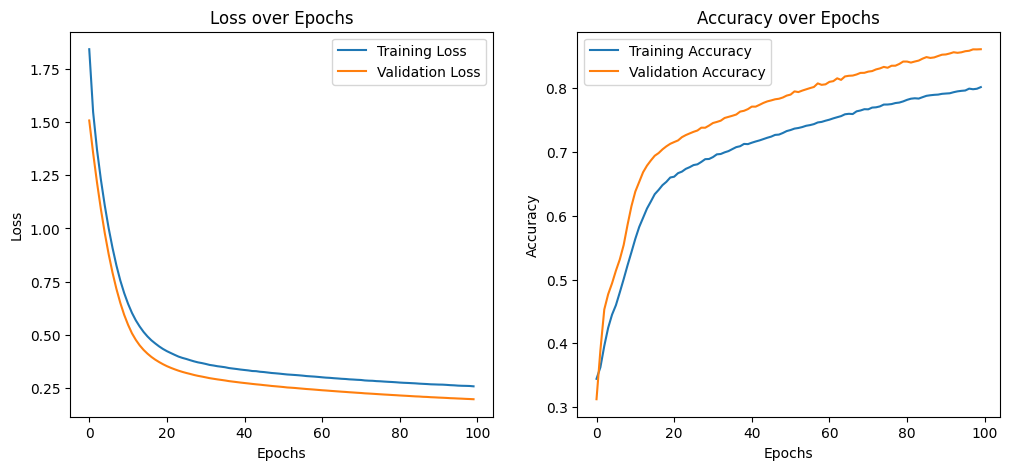

In [62]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Training Accuracy')
plt.plot(history.history['val_f1_score'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [63]:
new_data = np.array([[4,4,4,5,2,2,1,1,4,1,1,4,1,2,1,1,1,1,2,4,4,2,3,5,2,1,1,1,1,1,1,4,2,5,5,1,2,1,4,1,3,4,5,2,3,1,2,4]])

predictions = model.predict(new_data)
binary_predictions = (predictions >= THRESHOLD).astype(int)

print("Probabilitas Prediksi:", predictions)
print("Hasil Biner:", binary_predictions)

1/1 [==============================] - 0s 84ms/step
Probabilitas Prediksi: [[0.46828842 0.012915   0.10307809 0.00683691 0.12175385 0.65353876]]
Hasil Biner: [[1 0 0 0 0 1]]
